In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir featureextract

In [ ]:
import shutil 
shutil.unpack_archive("drive/MyDrive/featureextract.zip", "featureextract/")

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import pathlib

In [ ]:
from os import listdir
data_list = listdir('/content/featureextract/featureextract')

#Delete some classes that may interfere


data_list

['train', 'val']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATASET_PATH  = '/content/featureextract/featureextract/train'
test_dir =  '/content/featureextract/featureextract/val'
IMAGE_SIZE    = (256, 256)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0001 #start off with high rate first 0.001 #5e-4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='nearest')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                 
                                                  )

Found 1606 images belonging to 5 classes.


In [ ]:
validation_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  
                                                 
                                                  )

Found 401 images belonging to 5 classes.


In [ ]:
SHAPE_INP=(256,256, 3)
input_shape=(None,256,256, 3)
IMG_SIZE=256

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

keras = tf.keras

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
pip install keras --user

In [ ]:
IMG_SHAPE = (256, 256, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape= SHAPE_INP)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
from keras import models
from keras import layers

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D(name="last_layer"))
model.add(layers.Dense(2 , activation="softmax"))
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'],)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
last_layer (GlobalAveragePoo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10
validation_steps=5

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5/5 [==============================] - 38s 2s/step - loss: 0.8160 - accuracy: 0.4173


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.82
initial accuracy: 0.39


In [ ]:

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=validation_batches.n//validation_batches.batch_size
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches,
                    steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID,callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
117/117 [==============================] - 340s 3s/step - loss: 0.5032 - accuracy: 0.8133 - val_loss: 0.3874 - val_accuracy: 0.9121
Epoch 2/10
117/117 [==============================] - 316s 3s/step - loss: 0.2462 - accuracy: 0.9733 - val_loss: 0.2370 - val_accuracy: 0.9615
Epoch 3/10
117/117 [==============================] - 314s 3s/step - loss: 0.1360 - accuracy: 0.9840 - val_loss: 0.1496 - val_accuracy: 0.9714
Epoch 4/10
117/117 [==============================] - 316s 3s/step - loss: 0.0882 - accuracy: 0.9866 - val_loss: 0.1103 - val_accuracy: 0.9791
Epoch 5/10
117/117 [==============================] - 314s 3s/step - loss: 0.0688 - accuracy: 0.9880 - val_loss: 0.1006 - val_accuracy: 0.9802
Epoch 6/10
117/117 [==============================] - 317s 3s/step - loss: 0.0548 - accuracy: 0.9912 - val_loss: 0.0885 - val_accuracy: 0.9835
Epoch 7/10
117/117 [==============================] - 313s 3s/step - loss: 0.0449 - accuracy: 0.9909 - val_loss: 0.0740 - val_accuracy: 0.9802

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

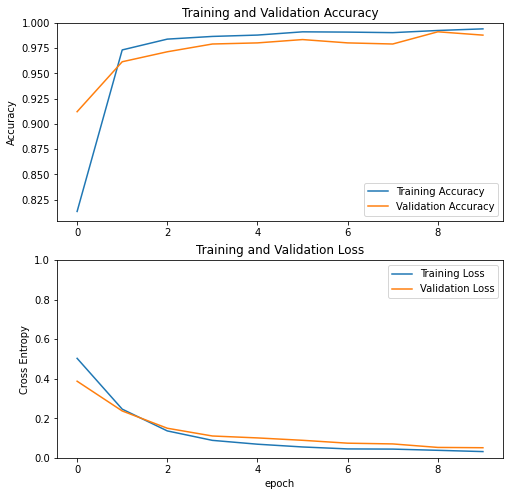

In [ ]:


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
last_layer (GlobalAveragePoo (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=validation_batches.n//validation_batches.batch_size

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches,
                         steps_per_epoch =STEP_SIZE_TRAIN,
    validation_steps = STEP_SIZE_VALID,callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 10/20
117/117 [==============================] - 314s 3s/step - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.0582 - val_accuracy: 0.9824
Epoch 11/20
117/117 [==============================] - 314s 3s/step - loss: 0.0303 - accuracy: 0.9928 - val_loss: 0.0470 - val_accuracy: 0.9890
Epoch 12/20
117/117 [==============================] - 312s 3s/step - loss: 0.0252 - accuracy: 0.9965 - val_loss: 0.0464 - val_accuracy: 0.9857
Epoch 13/20
117/117 [==============================] - 314s 3s/step - loss: 0.0286 - accuracy: 0.9925 - val_loss: 0.0570 - val_accuracy: 0.9802
Epoch 14/20
117/117 [==============================] - 311s 3s/step - loss: 0.0256 - accuracy: 0.9952 - val_loss: 0.0452 - val_accuracy: 0.9934
Epoch 15/20
117/117 [==============================] - 317s 3s/step - loss: 0.0252 - accuracy: 0.9955 - val_loss: 0.0618 - val_accuracy: 0.9835
Epoch 16/20
117/117 [==============================] - 314s 3s/step - loss: 0.0312 - accuracy: 0.9925 - val_loss: 0.0611 - val_accuracy:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

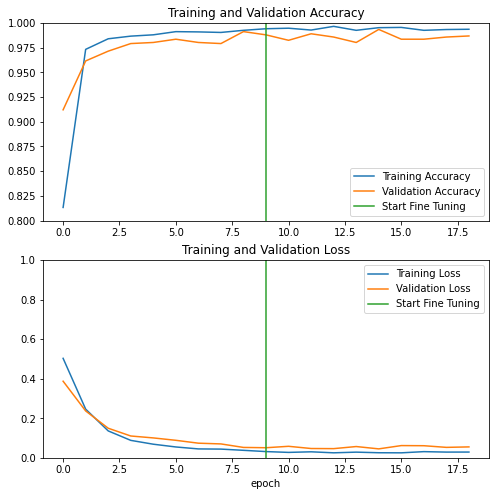

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('/content/mixedMobilnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model.save_weights(filepath='/content/weights_mixed.hdf5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        
        
        class_mode="categorical")
eval_generator.reset()

Found 1233 images belonging to 2 classes.


In [ ]:
eval_generator.reset()  
x = model.evaluate(eval_generator,  
                           steps = np.ceil(len(eval_generator) / 32),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                   )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

39/39 [==============================] - 2s 55ms/step - loss: 0.0175 - accuracy: 1.0000
Test loss: 0.017468459904193878
Test accuracy: 1.0


In [ ]:
preds = model.evaluate(eval_generator,batch_size=1,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

1233/1233 [==============================] - 96s 78ms/step - loss: 0.0136 - accuracy: 0.9976
Validation Loss = 0.013555833138525486
Validation Accuracy = 0.9975669384002686


In [ ]:
eval_generator.reset()  
pred = model.predict(eval_generator,steps = np.ceil(len(eval_generator) / 1),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1)
print("Predictions finished")

1233/1233 [==============================] - 86s 70ms/step
Predictions finished


In [ ]:
print(pred)

[[9.9995959e-01 4.0404633e-05]
 [9.9998593e-01 1.4027957e-05]
 [9.9999988e-01 7.1828381e-08]
 ...
 [1.6075493e-05 9.9998391e-01]
 [2.3854921e-04 9.9976140e-01]
 [1.9560163e-07 9.9999976e-01]]


In [ ]:
pred_labels = np.argmax(pred, axis = 1)

In [ ]:
print(pred_labels)

[0 0 0 ... 1 1 1]


In [ ]:
############################################################

In [ ]:
len(eval_generator.classes)

1233

In [ ]:
len(pred_labels)

1233

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(eval_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       702
           1       0.99      1.00      1.00       531

    accuracy                           1.00      1233
   macro avg       1.00      1.00      1.00      1233
weighted avg       1.00      1.00      1.00      1233



In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("/content/mixedMobilnet.h5")

    # image path
    #img_path = '/content/Places2/Places2/val/indoor/00000003 (3).jpg'   
    img_path = '/content/featureextract/featureextract/val/indoor/00000002 (14).jpg'     

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict_classes(new_image)

if pred==0:
  print("indoor")
else:
  print("outdoor")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


indoor


In [ ]:
########################Feature extraction##################3

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir wea

In [ ]:
import shutil 
shutil.unpack_archive("drive/MyDrive/wea.zip", "wea/")

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import pathlib

In [ ]:
from os import listdir
data_list = listdir('/content/wea/wea')

#Delete some classes that may interfere


data_list

['train', 'val']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATASET_PATH  = '/content/wea/wea/train'
test_dir =  '/content/wea/wea/val'
IMAGE_SIZE    = (256, 256)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32 # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0001 #start off with high rate first 0.001 #5e-4

In [ ]:
from keras.preprocessing import image
import pandas as pd
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import cv2
import tensorflow as tf
import h5py
#df = pd.read_excel("/content/feature.xls")


def load_image(img_path, show=False):

    #img = image.load_img(img_path, target_size=(256, 256))
    # (height, width, channels)
    img_tensor = image.img_to_array(img_path)  # img
    # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # imshow expects values in the range [0, 1]
    img_tensor /= 255.

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    #model = load_model("D:/DRDO/mixedMobilnet.h5")

    path = "/content/wea/wea/train/fog"
    x_feature=[]
    y_label=[]
    
    for image_path in os.listdir(path):
        # image path
        #img_path = 'D:/DRDO/testSetPlaces205_resize/00ffa154cfd6ddc5c3b483bf1c2976bb.jpg'
        #img_path = 'D:/Places2/train/outdoor/00000004.jpg'

        # load a single image
        input_path = os.path.join(path, image_path)
        new_image = imageio.imread(input_path)
        new_image = cv2.resize(new_image, (256, 256))
        new_image = load_image(new_image)
        layer = model.get_layer("last_layer")
        layer2 = tf.keras.Model(inputs=model.input, outputs=layer.output)
#for every image in every train label folder:
     #layer = model.get_layer("last_layer")
     #inter_layer_model = Model(inputs = base_model.input, outputs = layer.output)
        #temp = layer2.predict(np.expand_dims(new_image,axis=0))
        temp = layer2.predict(new_image)
        #print(temp)
        #print("#############")
        x_feature.append(np.squeeze(temp))
        #print(x_feature)
        y_label.append(0)
    #print(x_feature)
    #with h5py.File(( '/content/Traindata_svm.h5'), 'a') as hf:
      #hf.dataset("TrainFeatures",  data=x_feature)
      #hf.dataset("TrainLabels",  data=y_label)

In [ ]:
print(len(x_feature))
print(len(y_label))

400
400


In [ ]:
path = "/content/wea/wea/train/night"

    
for image_path in os.listdir(path):
    # image path
    #img_path = 'D:/DRDO/testSetPlaces205_resize/00ffa154cfd6ddc5c3b483bf1c2976bb.jpg'
    #img_path = 'D:/Places2/train/outdoor/00000004.jpg'

    # load a single image
    input_path = os.path.join(path, image_path)
    new_image = imageio.imread(input_path)
    new_image = cv2.resize(new_image, (256, 256))
    new_image = load_image(new_image)
    layer = model.get_layer("last_layer")
    layer2 = tf.keras.Model(inputs=model.input, outputs=layer.output)
#for every image in every train label folder:
  #layer = model.get_layer("last_layer")
  #inter_layer_model = Model(inputs = base_model.input, outputs = layer.output)
    #temp = layer2.predict(np.expand_dims(new_image,axis=0))
    temp = layer2.predict(new_image)
    #print(temp)
    #print("#############")
    x_feature.append(np.squeeze(temp))
    #print(x_feature)
    y_label.append(1)

In [ ]:
print(len(x_feature))
print(len(y_label))

800
800


In [ ]:
path = "/content/wea/wea/train/normal"

    
for image_path in os.listdir(path):
    # image path
    #img_path = 'D:/DRDO/testSetPlaces205_resize/00ffa154cfd6ddc5c3b483bf1c2976bb.jpg'
    #img_path = 'D:/Places2/train/outdoor/00000004.jpg'

    # load a single image
    input_path = os.path.join(path, image_path)
    new_image = imageio.imread(input_path)
    new_image = cv2.resize(new_image, (256, 256))
    new_image = load_image(new_image)
    layer = model.get_layer("last_layer")
    layer2 = tf.keras.Model(inputs=model.input, outputs=layer.output)
#for every image in every train label folder:
  #layer = model.get_layer("last_layer")
  #inter_layer_model = Model(inputs = base_model.input, outputs = layer.output)
    #temp = layer2.predict(np.expand_dims(new_image,axis=0))
    temp = layer2.predict(new_image)
    #print(temp)
    #print("#############")
    x_feature.append(np.squeeze(temp))
    #print(x_feature)
    y_label.append(2)

In [ ]:
print(len(x_feature))
print(len(y_label))

1207
1207


In [ ]:
path = "/content/wea/wea/train/rain"

    
for image_path in os.listdir(path):
    # image path
    #img_path = 'D:/DRDO/testSetPlaces205_resize/00ffa154cfd6ddc5c3b483bf1c2976bb.jpg'
    #img_path = 'D:/Places2/train/outdoor/00000004.jpg'

    # load a single image
    input_path = os.path.join(path, image_path)
    new_image = imageio.imread(input_path)
    new_image = cv2.resize(new_image, (256, 256))
    new_image = load_image(new_image)
    layer = model.get_layer("last_layer")
    layer2 = tf.keras.Model(inputs=model.input, outputs=layer.output)
#for every image in every train label folder:
  #layer = model.get_layer("last_layer")
  #inter_layer_model = Model(inputs = base_model.input, outputs = layer.output)
    #temp = layer2.predict(np.expand_dims(new_image,axis=0))
    temp = layer2.predict(new_image)
    #print(temp)
    #print("#############")
    x_feature.append(np.squeeze(temp))
    #print(x_feature)
    y_label.append(3)

In [ ]:
print(len(x_feature))
print(len(y_label))

1607
1607


In [ ]:
path = "/content/wea/wea/train/snow"

    
for image_path in os.listdir(path):
    # image path
    #img_path = 'D:/DRDO/testSetPlaces205_resize/00ffa154cfd6ddc5c3b483bf1c2976bb.jpg'
    #img_path = 'D:/Places2/train/outdoor/00000004.jpg'

    # load a single image
    input_path = os.path.join(path, image_path)
    new_image = imageio.imread(input_path)
    new_image = cv2.resize(new_image, (256, 256))
    new_image = load_image(new_image)
    layer = model.get_layer("last_layer")
    layer2 = tf.keras.Model(inputs=model.input, outputs=layer.output)
#for every image in every train label folder:
  #layer = model.get_layer("last_layer")
  #inter_layer_model = Model(inputs = base_model.input, outputs = layer.output)
    #temp = layer2.predict(np.expand_dims(new_image,axis=0))
    temp = layer2.predict(new_image)
    #print(temp)
    #print("#############")
    x_feature.append(np.squeeze(temp))
    #print(x_feature)
    y_label.append(4)

In [ ]:
print(len(x_feature))
print(len(y_label))

2007
2007


In [ ]:
import h5py
with h5py.File(( '/content/Traindata_svm.h5'), 'w') as hf:
  hf.create_dataset("TrainFeatures",  data=x_feature)
  hf.create_dataset("TrainLabels",  data=y_label)

In [ ]:
#############SVM#####################

In [3]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
import h5py
with h5py.File('/content/drive/MyDrive/Traindata_svm(1).h5', 'r') as hf:
  keys = list(hf.keys())
    #print(keys)
  X_train = hf['TrainFeatures'][:]
  y_train = hf['TrainLabels'][:]
from sklearn.preprocessing import MultiLabelBinarizer
#y_train = MultiLabelBinarizer().fit_transform(y_train)


In [5]:
with h5py.File('/content/drive/MyDrive/Testdata_svm(1).h5', 'r') as hf:
  keys = list(hf.keys())
    #print(keys)
  X_test = hf['TestFeatures'][:]
  y_test = hf['TestLabels'][:]
#y_test = MultiLabelBinarizer().fit_transform(y_test)


In [ ]:
###############poly################

In [12]:

poly = svm.SVC(kernel='poly', degree=5, C=1).fit(X_train, y_train)

In [13]:
poly_pred = poly.predict(X_test)


In [15]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  90.40
F1 (Polynomial Kernel):  90.27


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       100
           1       1.00      1.00      1.00       106
           2       0.94      0.76      0.84       125
           3       0.84      0.90      0.87       100
           4       0.87      0.96      0.91       100

    accuracy                           0.90       531
   macro avg       0.90      0.91      0.90       531
weighted avg       0.91      0.90      0.90       531



In [ ]:
#############ovo##############

In [9]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
pred  = clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
print('Accuracy : ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (f1*100))

Accuracy :  91.53
F1 :  91.40


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.99      1.00      1.00       106
           2       0.95      0.77      0.85       125
           3       0.83      0.93      0.88       100
           4       0.90      0.96      0.93       100

    accuracy                           0.92       531
   macro avg       0.92      0.92      0.92       531
weighted avg       0.92      0.92      0.91       531



In [ ]:
###################ovr#############(HIGHEST)

In [6]:
svm_ovr = svm.SVC(kernel='linear', gamma='auto', decision_function_shape='ovr')
svm_ovr.fit(X_train, y_train)
pred1 = svm_ovr.predict(X_test)

In [7]:
accuracy1 = accuracy_score(y_test, pred1)
f11 = f1_score(y_test, pred1, average='weighted')
print('Accuracy : ', "%.2f" % (accuracy1*100))
print('F1 : ', "%.2f" % (f11*100))

Accuracy :  93.41
F1 :  93.37


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       1.00      1.00      1.00       106
           2       0.91      0.85      0.88       125
           3       0.94      0.92      0.93       100
           4       0.95      0.98      0.97       100

    accuracy                           0.93       531
   macro avg       0.93      0.94      0.94       531
weighted avg       0.93      0.93      0.93       531

